## Import libraries

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
filename = 'Team 6 South America.xlsx'
southAmerica = pd.read_excel(filename, index_col='Country Code')
# Check the information of raw data
southAmerica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, ARG to VEN
Data columns (total 67 columns):
Country Name                                                                                                  13 non-null object
Counter                                                                                                       13 non-null int64
Hult Region                                                                                                   13 non-null object
Cool Name                                                                                                     13 non-null object
Access to electricity (% of population)                                                                       13 non-null float64
Access to electricity, rural (% of rural population)                                                          13 non-null float64
Access to electricity, urban (% of urban population)                                                          13 non-null fl

## Missing value

### Detect missing value

In [3]:
# Calculating the percentage of missing value
missing = southAmerica.isnull().sum() / southAmerica.shape[0]
# Sorting by the percentage
missing.sort_values(ascending=False)

Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)                        1.000000
Prevalence of underweight, weight for age (% of children under 5)                                             1.000000
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)               0.923077
Government expenditure on education, total (% of government expenditure)                                      0.769231
GINI index (World Bank estimate)                                                                              0.307692
Income share held by fourth 20%                                                                               0.307692
Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)                                           0.307692
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)                                           0.307692
Income share held by lowest 20%                 

### Drop columns

In [4]:
# if the count of missing values is great than 5
# drop this column
Threshold = 5
southAmerica = southAmerica.dropna(axis=1, thresh=Threshold)
southAmerica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, ARG to VEN
Data columns (total 63 columns):
Country Name                                                                                                  13 non-null object
Counter                                                                                                       13 non-null int64
Hult Region                                                                                                   13 non-null object
Cool Name                                                                                                     13 non-null object
Access to electricity (% of population)                                                                       13 non-null float64
Access to electricity, rural (% of rural population)                                                          13 non-null float64
Access to electricity, urban (% of urban population)                                                          13 non-null fl

### Fill missing value

In [5]:
# For following columns, replace the missing value with average
missing_list_average = ["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)", 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)', 'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)'            
                  ,'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)', 'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)', 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)', 'GINI index (World Bank estimate)', 'Income share held by fourth 20%','Income share held by highest 20%', 'Income share held by lowest 20%', 'Income share held by second 20%','Income share held by third 20%','Industry (including construction), value added (% of GDP)',
                   'Literacy rate, youth total (% of people ages 15-24)','Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)','Population in the largest city (% of urban population)','Prevalence of HIV, total (% of population ages 15-49)','Prevalence of undernourishment (% of population)','Tax revenue (% of GDP)']   
# For following columns, replace the missing value with grouped average, because there are extreme values
missing_list_median = ['Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
                 'Poverty headcount ratio at national poverty lines (% of population)']

In [6]:
# Filling missing value
for each in missing_list_average:
    average = southAmerica.loc[:, each].mean()
    southAmerica.loc[:, each].fillna(average, inplace=True)
southAmerica.loc[:, missing_list_average].describe()

,"Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,"Industry (including construction), value added (% of GDP)","Literacy rate, youth total (% of people ages 15-24)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Population in the largest city (% of urban population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Tax revenue (% of GDP)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,23.363565,70.843148,27.076651,85.868429,26.956651,55.241844,45.677778,21.211111,50.966667,4.622222,9.188889,14.011111,27.353115,98.787007,48.177424,1.465265,31.504897,0.618182,8.358333,15.631468
std,10.085820,14.123947,10.243074,7.403051,10.235342,14.216462,3.565057,1.218226,3.357827,0.630843,0.784691,1.014433,5.343776,0.708414,26.321236,0.824262,19.122283,0.384747,5.600217,9.834306
min,11.335650,49.100000,13.166510,72.000000,13.166510,30.018440,39.500000,19.500000,45.800000,3.200000,7.400000,12.200000,18.239083,96.690000,18.278629,0.000000,0.637012,0.300000,2.500000,0.054039
25%,18.500000,58.800000,19.400000,82.900000,19.400000,43.600000,44.000000,20.100000,48.500000,4.600000,9.188889,13.200000,24.752314,98.670000,28.936611,0.893948,23.161167,0.400000,4.600000,12.121212
50%,23.363565,70.843148,27.076651,85.868429,26.956651,55.241844,45.677778,21.211111,50.966667,4.622222,9.188889,14.011111,27.353115,98.932602,45.722796,1.465265,31.504897,0.500000,8.100000,15.194617
75%,25.600000,84.200000,33.000000,91.900000,33.000000,66.900000,46.600000,22.200000,52.900000,4.700000,9.500000,14.900000,31.881223,99.060000,52.687976,1.935613,41.012620,0.618182,9.700000,16.400000
max,43.600000,91.900000,43.600000,95.200000,43.600000,79.700000,53.300000,23.200000,57.800000,5.900000,10.600000,15.400000,34.383381,99.500000,110.728543,3.186273,74.472819,1.500000,21.200000,44.200000


In [7]:
# Dividing data into 2 groups according to gdp per capita
# Filling the missing value with grouped average
southAmerica['gdp_capita'] = southAmerica['GDP (current US$)'] / southAmerica['Population, total']
southAmerica['high_ppp'] = southAmerica['gdp_capita'] > 10000
for each in missing_list_median:
    average = southAmerica.loc[:, [each, 'high_ppp']].groupby('high_ppp').mean()
    for item in southAmerica.index:
        if (np.isnan(southAmerica.loc[item, each])):
            southAmerica.loc[item, each] = average.loc['high_ppp' == southAmerica.loc[item, 'high_ppp'], each]
southAmerica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, ARG to VEN
Data columns (total 65 columns):
Country Name                                                                                                  13 non-null object
Counter                                                                                                       13 non-null int64
Hult Region                                                                                                   13 non-null object
Cool Name                                                                                                     13 non-null object
Access to electricity (% of population)                                                                       13 non-null float64
Access to electricity, rural (% of rural population)                                                          13 non-null float64
Access to electricity, urban (% of urban population)                                                          13 non-null fl

## Save data

In [8]:
# Saving data to new file
southAmerica.to_excel('finalData.xlsx', index=False)

## Data slicing

In [6]:
# loading the new data
df = pd.read_excel('finalData.xlsx')

# Slicing the columns into 4 subsets: Government, Economy, People, Education
df_government=df.loc[:,['Country Name','Armed forces personnel (% of total labor force)'
                        ,'Employment in agriculture (% of total employment) (modeled ILO estimate)'
                        ,'Employment in industry (% of total employment) (modeled ILO estimate)'
                        ,'Employment in services (% of total employment) (modeled ILO estimate)'
                        ,'Military expenditure (% of GDP)'
                        ,'Services, value added (% of GDP)'
                        ,'Surface area (sq. km)'
                        ,'Tax revenue (% of GDP)']]


df_economy = df.loc[:,['Country Name','Agriculture, forestry, and fishing, value added (% of GDP)',
                        'GDP (current US$)',
                        'GDP growth (annual %)',
                        'GINI index (World Bank estimate)',
                        'Income share held by fourth 20%',
                        'Income share held by highest 20%',
                        'Income share held by lowest 20%',
                        'Income share held by second 20%',
                        'Income share held by third 20%',
                        'Industry (including construction), value added (% of GDP)',
                        'Merchandise trade (% of GDP)',
                        'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure',
                        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
                        'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)',
                        'Poverty headcount ratio at national poverty lines (% of population)',
                        'gdp_capita']]


df_education = df.loc[:, ['Country Name','Educational attainment, at least Bachelor\'s or equivalent, population 25+, total (%) (cumulative)'
                        ,'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'
                        ,'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)'
                        ,'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)'
                        ,'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)'
                        ,'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)'
                        ,'Literacy rate, adult total (% of people ages 15 and above)'
                        ,'Literacy rate, youth total (% of people ages 15-24)'
                        ,'gdp_capita']]


df_people = df.loc[:,['Country Name','Access to electricity (% of population)'
                        ,'Access to electricity, rural (% of rural population)'
                        ,'Access to electricity, urban (% of urban population)'
                        ,'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                        ,'Age dependency ratio (% of working-age population)'
                        ,'Age dependency ratio, old (% of working-age population)'
                        ,'Age dependency ratio, young (% of working-age population)'
                        ,'Birth rate, crude (per 1,000 people)'
                        ,'Births attended by skilled health staff (% of total)'
                        ,'Death rate, crude (per 1,000 people)'
                        ,'Fertility rate, total (births per woman)'
                        ,'Life expectancy at birth, total (years)'
                        ,'Mobile cellular subscriptions (per 100 people)'
                        ,'Population ages 0-14 (% of total population)'
                        ,'Population ages 15-64 (% of total population)'
                        ,'Population ages 65 and above (% of total population)'
                        ,'Population density (people per sq. km of land area)'
                        ,'Population growth (annual %)'
                        ,'Population in the largest city (% of urban population)'
                        ,'Population living in slums (% of urban population)'
                        ,'Population, female'
                        ,'Population, male'
                        ,'Population, total'
                        ,'Prevalence of HIV, total (% of population ages 15-49)'
                        ,'Prevalence of undernourishment (% of population)'
                        ,'Rural population (% of total population)'
                        ,'Urban population (% of total population)'
                        ,'Urban population growth (annual %)']]

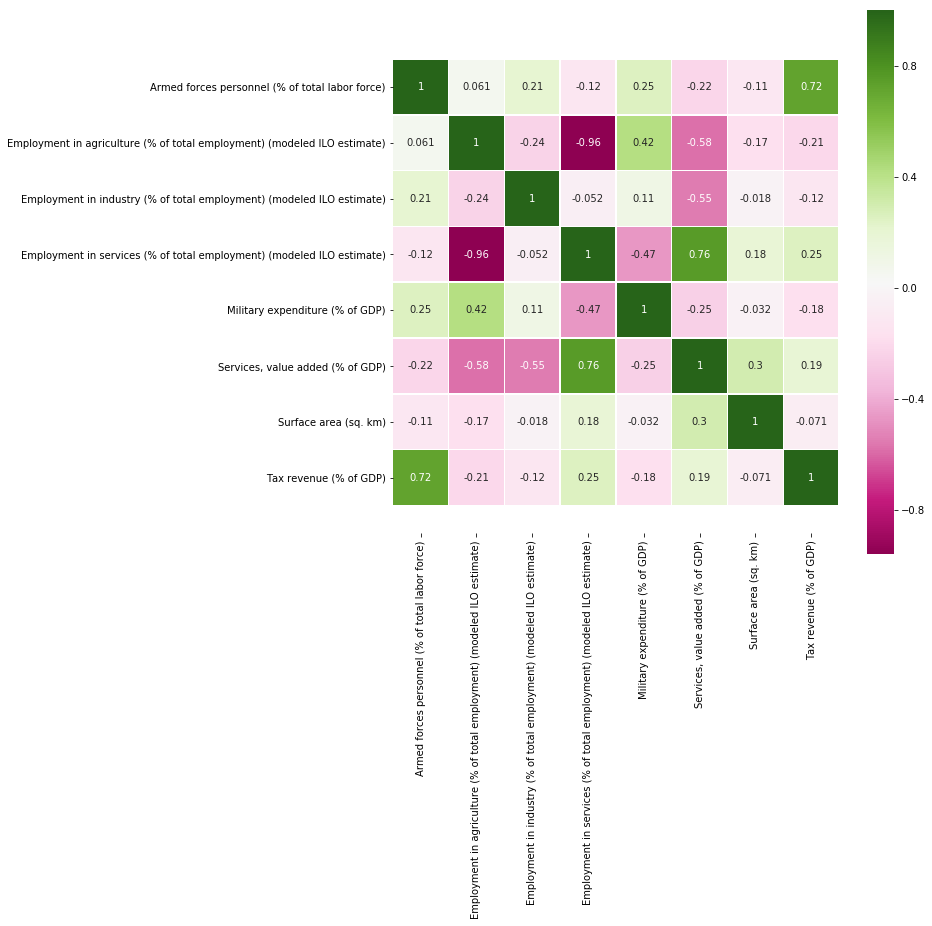

In [10]:
# Plot the Government subset
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df_government.corr(), cmap= 'PiYG', annot=True, square = True, linecolor = 'white', linewidths = 0.5)
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values
plt.savefig('df_government.png')
plt.show()

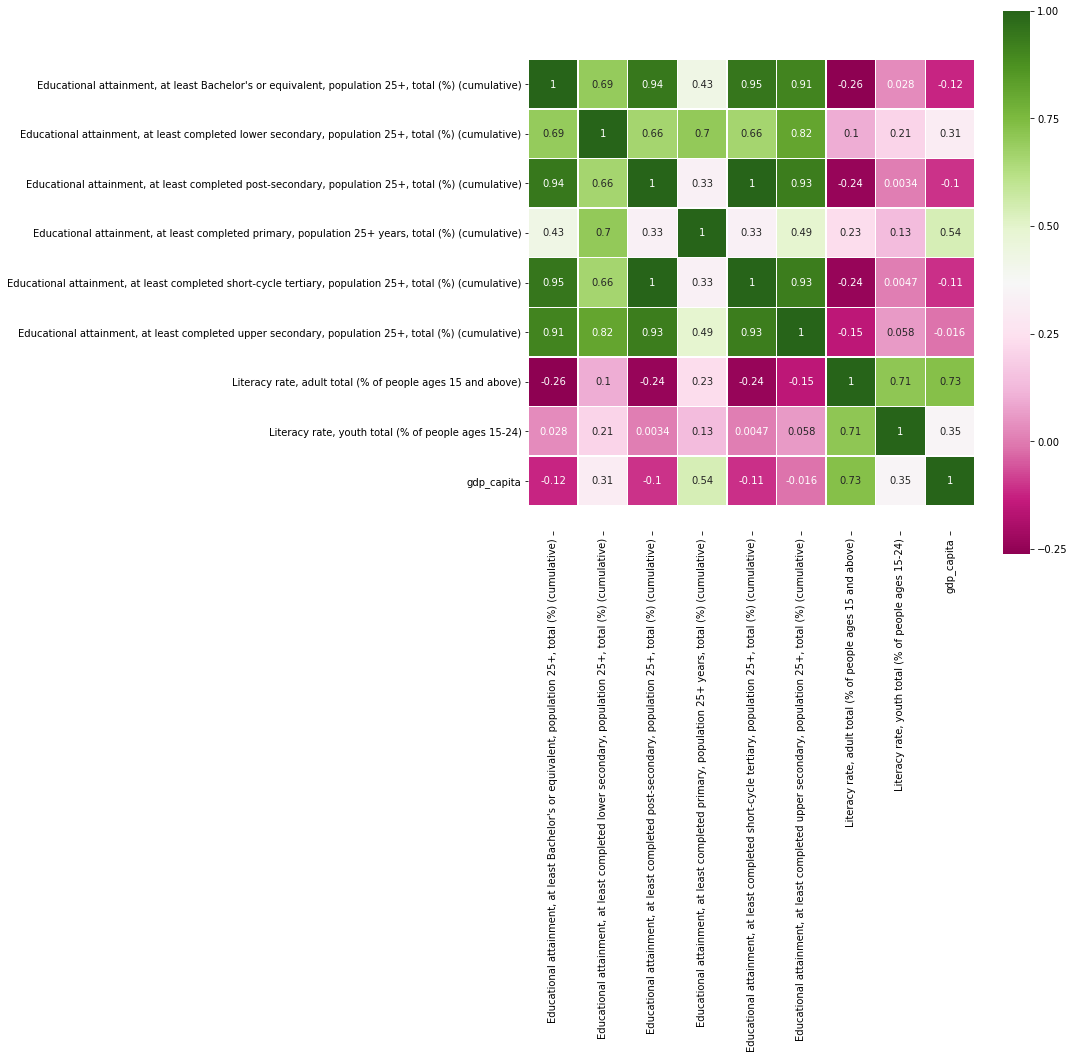

In [11]:
# Plot the Education subset
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df_education.corr(), cmap= 'PiYG', annot=True, square = True, linecolor = 'white', linewidths = 0.5)
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values
plt.savefig('df_education.png')
plt.show()

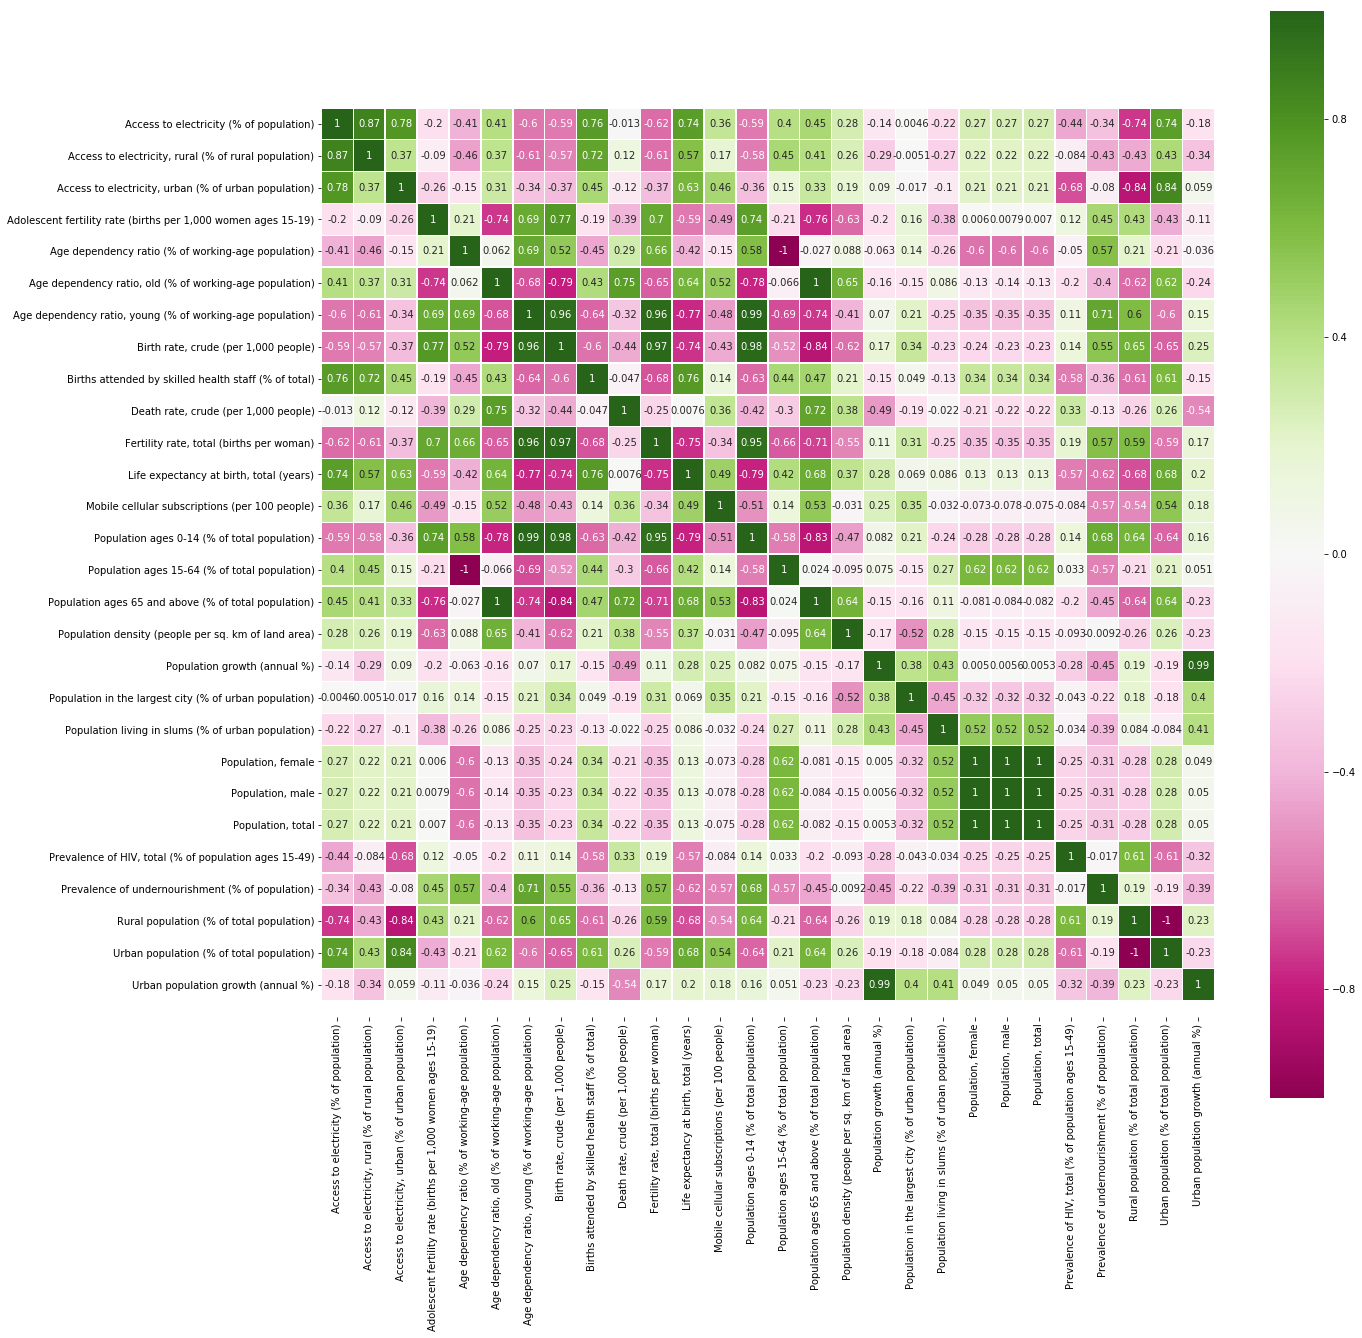

In [12]:
# Plot the People subset
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df_people.corr(), cmap= 'PiYG', annot=True, square = True, linecolor = 'white', linewidths = 0.5)
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values
plt.savefig('df_people.png')
plt.show()

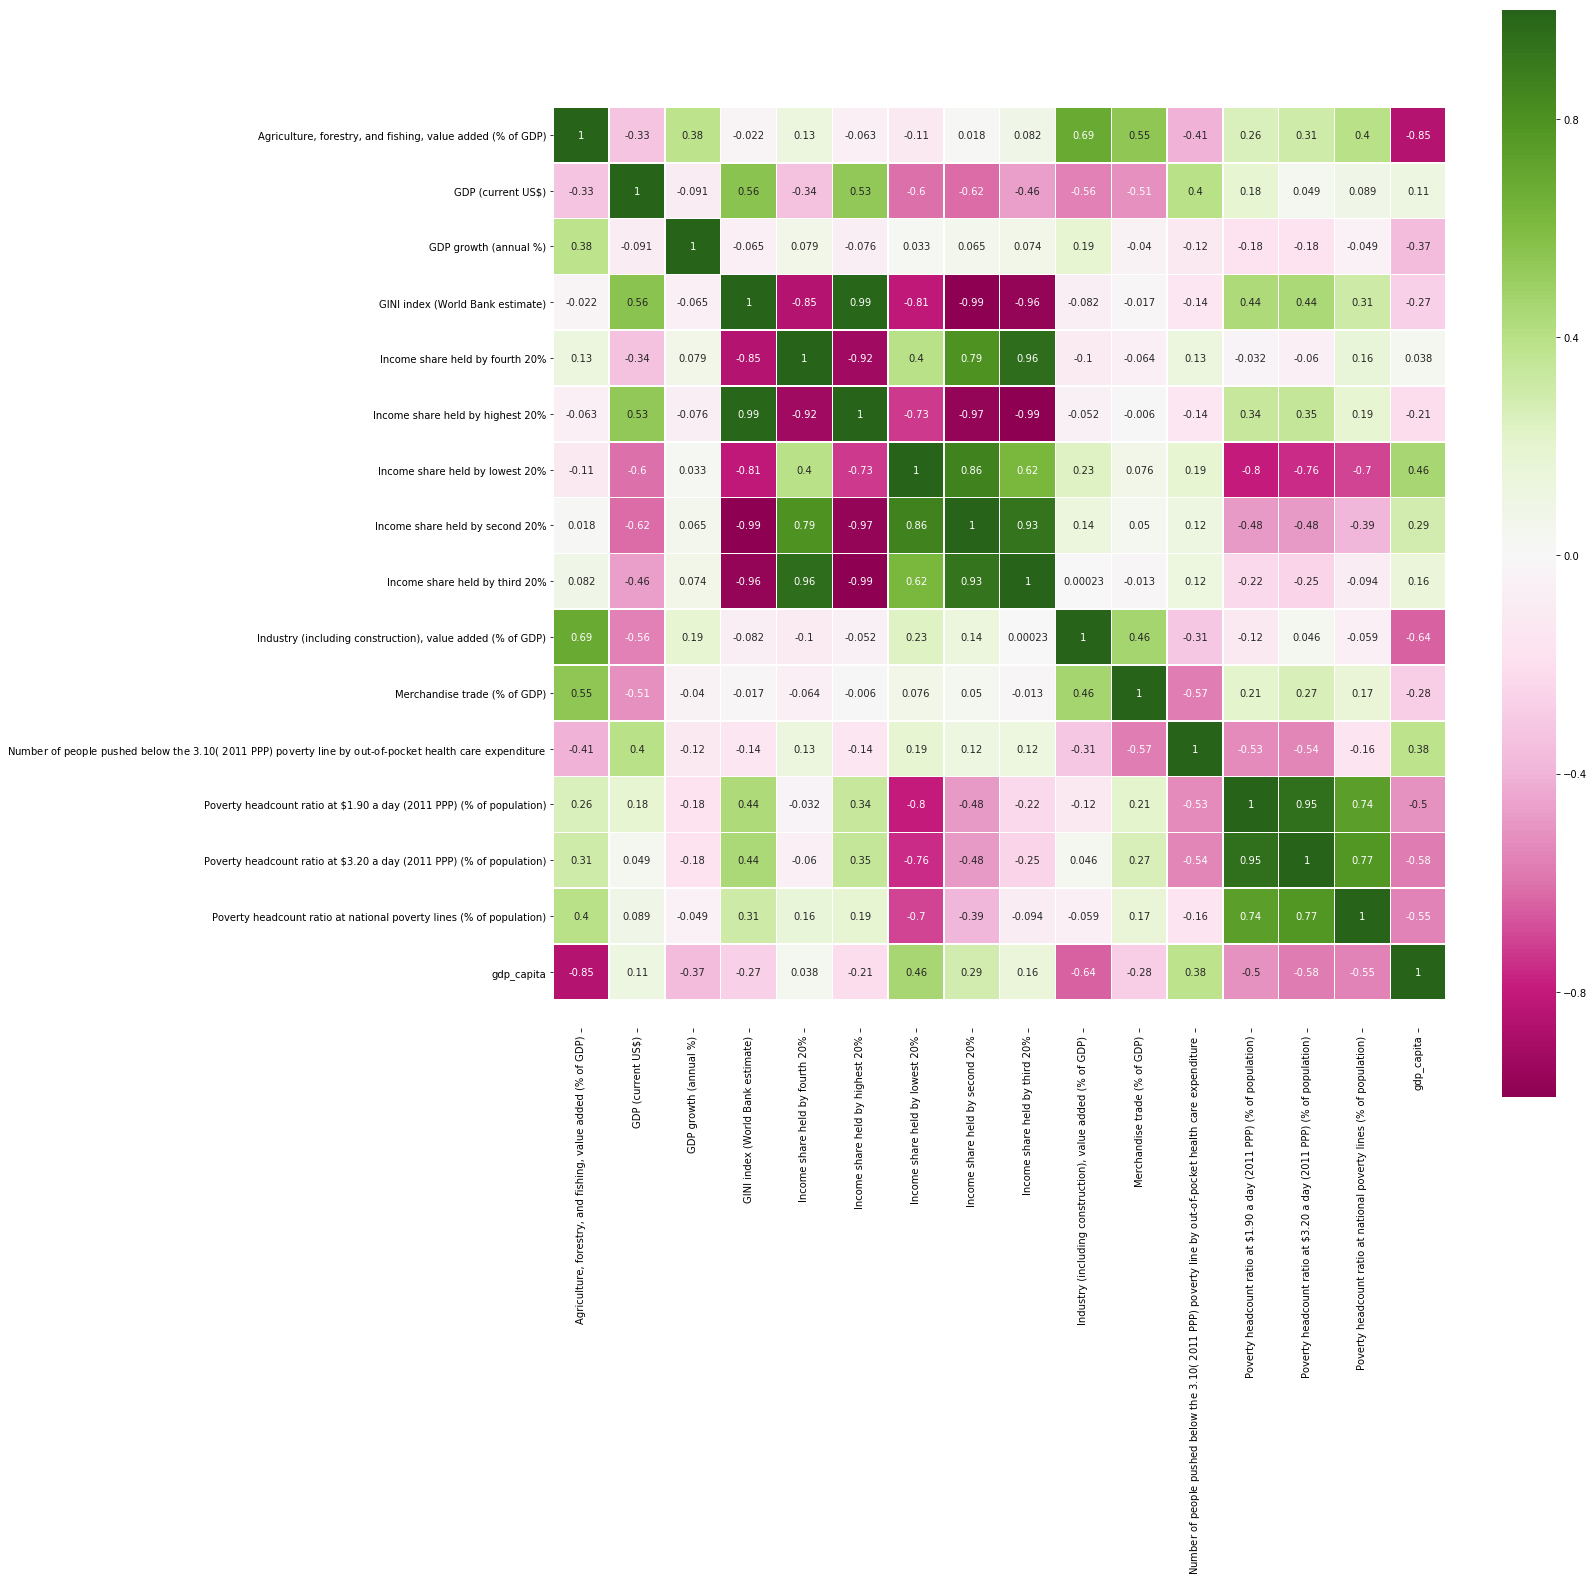

In [13]:
# Plot the Economy subset
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df_economy.corr(), cmap= 'PiYG', annot=True, square = True, linecolor = 'white', linewidths = 0.5)
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values
plt.savefig('df_economy.png')
plt.show()

## Explore data

In [14]:
# In this part, we dig into data to find out the relationship between variables,
# As for the outliers, we did in-depth analysis by using scatter and lmplots

<Figure size 864x576 with 0 Axes>

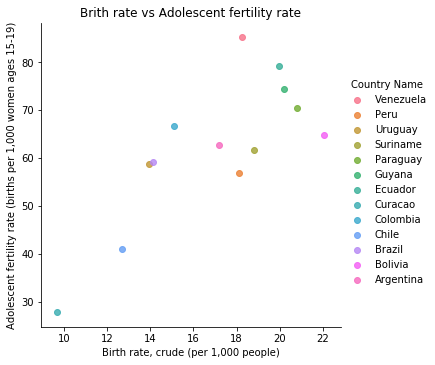

In [15]:
plt.figure(figsize=(12, 8))
sns.lmplot(x="Birth rate, crude (per 1,000 people)", y="Adolescent fertility rate (births per 1,000 women ages 15-19)", hue='Country Name',
               truncate=True, height=5, data=df_people, hue_order= ['Venezuela','Peru','Uruguay','Suriname','Paraguay','Guyana','Ecuador','Curacao','Colombia','Chile','Brazil','Bolivia','Argentina'])
plt.title("Brith rate vs Adolescent fertility rate")
plt.savefig('Brith rate vs Adolescent fertility rate.png')
plt.show()

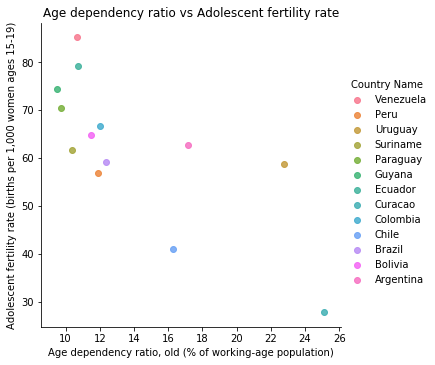

In [16]:
sns.lmplot(x="Age dependency ratio, old (% of working-age population)", y="Adolescent fertility rate (births per 1,000 women ages 15-19)", hue='Country Name',
               truncate=True, height=5, data=df_people, hue_order= ['Venezuela','Peru','Uruguay','Suriname','Paraguay','Guyana','Ecuador','Curacao','Colombia','Chile','Brazil','Bolivia','Argentina'])
plt.title("Age dependency ratio vs Adolescent fertility rate")
plt.savefig('Age dependency ratio vs Adolescent fertility rate.png')
plt.show()

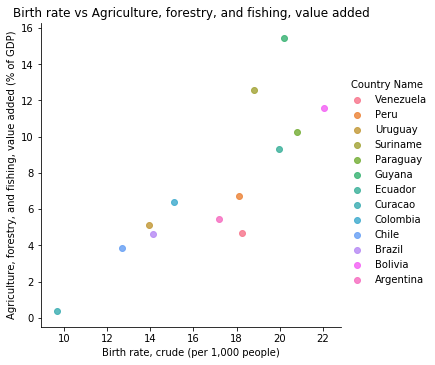

In [17]:
sns.lmplot(x="Birth rate, crude (per 1,000 people)", y="Agriculture, forestry, and fishing, value added (% of GDP)", hue='Country Name',
               truncate=True, height=5, data=df, hue_order= ['Venezuela','Peru','Uruguay','Suriname','Paraguay','Guyana','Ecuador','Curacao','Colombia','Chile','Brazil','Bolivia','Argentina'])
plt.title("Birth rate vs Agriculture, forestry, and fishing, value added")
plt.savefig('Birth rate vs Agriculture, forestry, and fishing, value added.png')
plt.show()

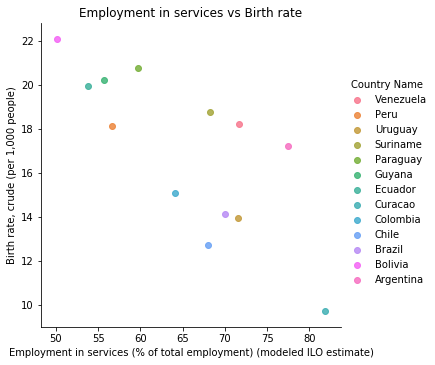

In [18]:
sns.lmplot(x="Employment in services (% of total employment) (modeled ILO estimate)", y="Birth rate, crude (per 1,000 people)", hue='Country Name',
               truncate=True, height=5, data=df, hue_order= ['Venezuela','Peru','Uruguay','Suriname','Paraguay','Guyana','Ecuador','Curacao','Colombia','Chile','Brazil','Bolivia','Argentina'])
plt.title("Employment in services vs Birth rate")
plt.savefig('Employment in services vs Birth rate.png')
plt.show()

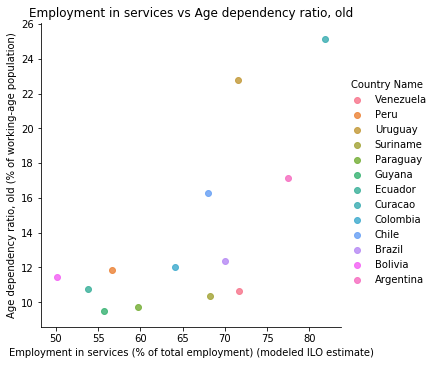

In [19]:
sns.lmplot(x="Employment in services (% of total employment) (modeled ILO estimate)", y="Age dependency ratio, old (% of working-age population)", hue='Country Name',
               truncate=True, height=5, data=df, hue_order= ['Venezuela','Peru','Uruguay','Suriname','Paraguay','Guyana','Ecuador','Curacao','Colombia','Chile','Brazil','Bolivia','Argentina'])
plt.title("Employment in services vs Age dependency ratio, old")
plt.savefig('Employment in services vs Age dependency ratio, old.png')
plt.show()

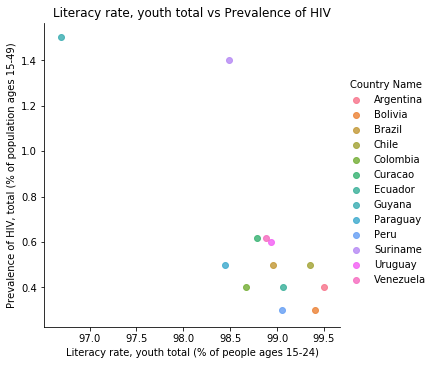

In [20]:
sns.lmplot(x = "Literacy rate, youth total (% of people ages 15-24)", 
           y = "Prevalence of HIV, total (% of population ages 15-49)" , data=df, hue='Country Name', truncate=True)
plt.title("Literacy rate, youth total vs Prevalence of HIV")
plt.savefig('Literacy rate, youth total vs Prevalence of HIV.png')
plt.show()

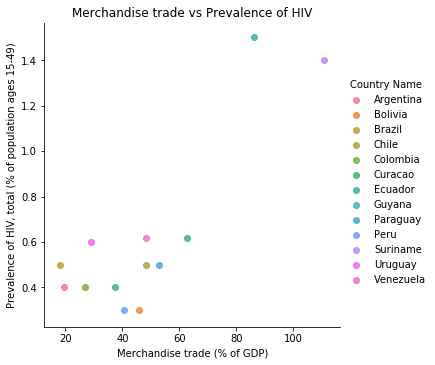

In [21]:
sns.lmplot(x = "Merchandise trade (% of GDP)",
           y = "Prevalence of HIV, total (% of population ages 15-49)" , data=df, hue="Country Name", truncate=True)
plt.title("Merchandise trade vs Prevalence of HIV")
plt.savefig('Merchandise trade vs Prevalence of HIV.png')
plt.show()

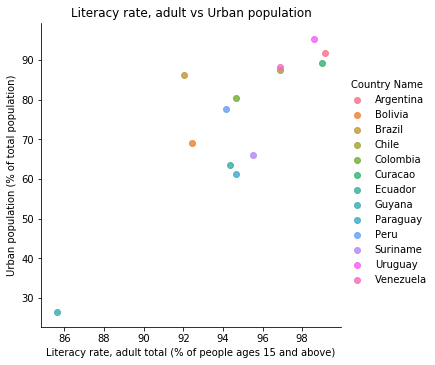

In [22]:
sns.lmplot(x = "Literacy rate, adult total (% of people ages 15 and above)",
           y = "Urban population (% of total population)" , data=df, hue="Country Name", truncate=True)
plt.title("Literacy rate, adult vs Urban population")
plt.savefig('Literacy rate, adult vs Urban population.png')
plt.show()

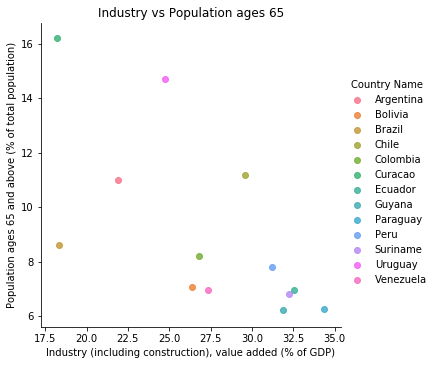

In [23]:
sns.lmplot(x = "Industry (including construction), value added (% of GDP)",
           y="Population ages 65 and above (% of total population)", data=df, hue="Country Name", truncate=True)
plt.title("Industry vs Population ages 65")
plt.savefig('Industry vs Population ages 65.png')
plt.show()

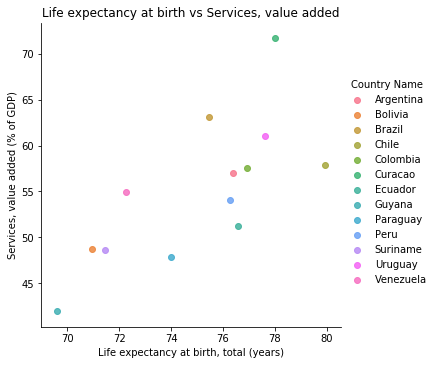

In [24]:
sns.lmplot(x = "Life expectancy at birth, total (years)",
           y = "Services, value added (% of GDP)" , data=df, hue="Country Name", truncate=True)
plt.title("Life expectancy at birth vs Services, value added")
plt.savefig('Life expectancy at birth vs Services, value added.png')
plt.show()

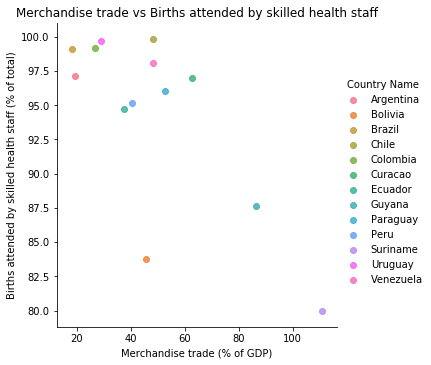

In [25]:
sns.lmplot(x = "Merchandise trade (% of GDP)", y = "Births attended by skilled health staff (% of total)" 
           , data=df, hue="Country Name", truncate=True)
plt.title("Merchandise trade vs Births attended by skilled health staff")
plt.savefig('Merchandise trade vs Births attended by skilled health staff.png')
plt.show()

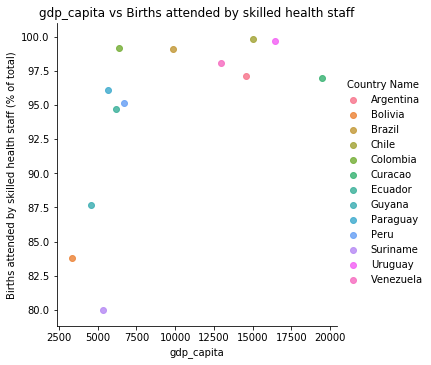

In [26]:
sns.lmplot(x = "gdp_capita", y = "Births attended by skilled health staff (% of total)" 
           , data=df,height=5, hue="Country Name", truncate=True)
plt.title("gdp_capita vs Births attended by skilled health staff")
plt.savefig('gdp_capita vs Births attended by skilled health staff.png')
plt.show()

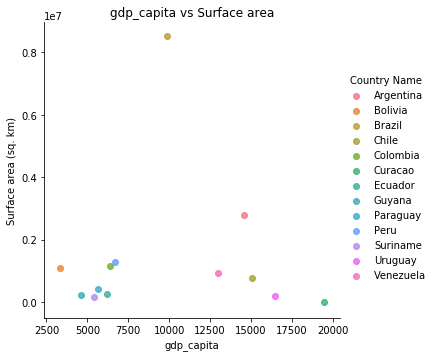

In [27]:
sns.lmplot(x = "gdp_capita", y = "Surface area (sq. km)" ,
           data=df, hue="Country Name", truncate=True)
plt.title("gdp_capita vs Surface area")
plt.savefig('gdp_capita vs Surface area.png')
plt.show()

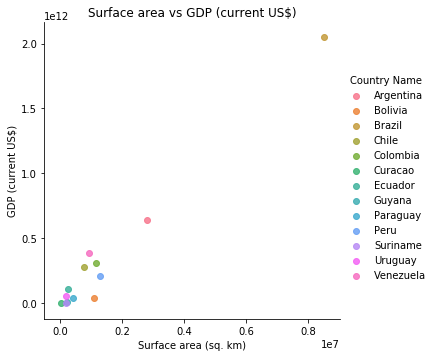

In [28]:
sns.lmplot(x = "Surface area (sq. km)", y = "GDP (current US$)" ,
           data=df, hue="Country Name", truncate=True)
plt.title("Surface area vs GDP (current US$)")
plt.savefig('Surface area vs GDP (current US$).png')
plt.show()

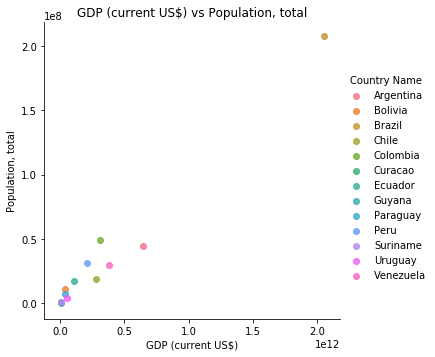

In [29]:
sns.lmplot(x = "GDP (current US$)", y = "Population, total" ,
           data=df, hue="Country Name", truncate=True)
plt.title("GDP (current US$) vs Population, total")
plt.savefig('GDP (current US$) vs Population, total.png')
plt.show()

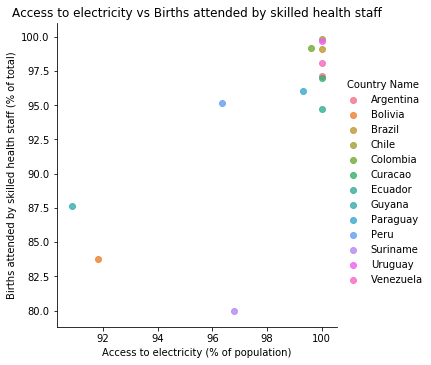

In [30]:
sns.lmplot(x = "Access to electricity (% of population)",
           y = "Births attended by skilled health staff (% of total)" , data=df, hue="Country Name", truncate=True)
plt.title("Access to electricity vs Births attended by skilled health staff")
plt.savefig('Access to electricity vs Births attended by skilled health staff.png')
plt.show()

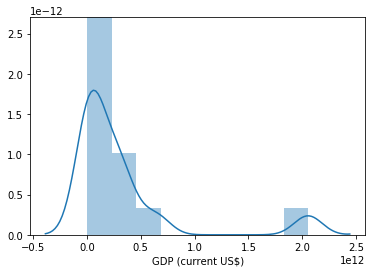

In [31]:
sns.distplot(df['GDP (current US$)'])
plt.savefig("GDP (current US$).png")
plt.show()

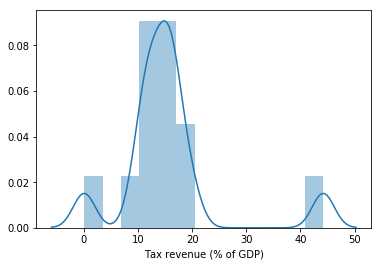

In [32]:
sns.distplot(df['Tax revenue (% of GDP)'])
plt.savefig('Tax revenue.png')
plt.show()

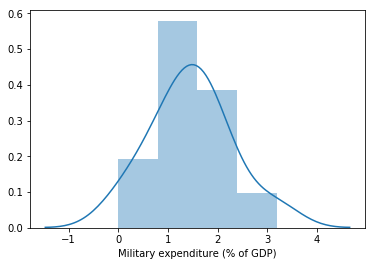

In [33]:
sns.distplot(df['Military expenditure (% of GDP)'])
plt.savefig('Military expenditure.png')
plt.show()

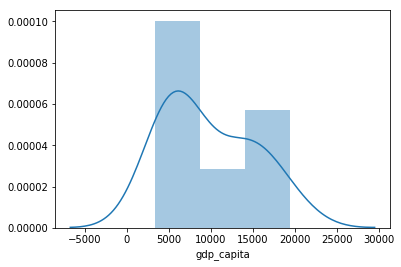

In [34]:
sns.distplot(df['gdp_capita'])
plt.savefig('gdp_capita.png')
plt.show()

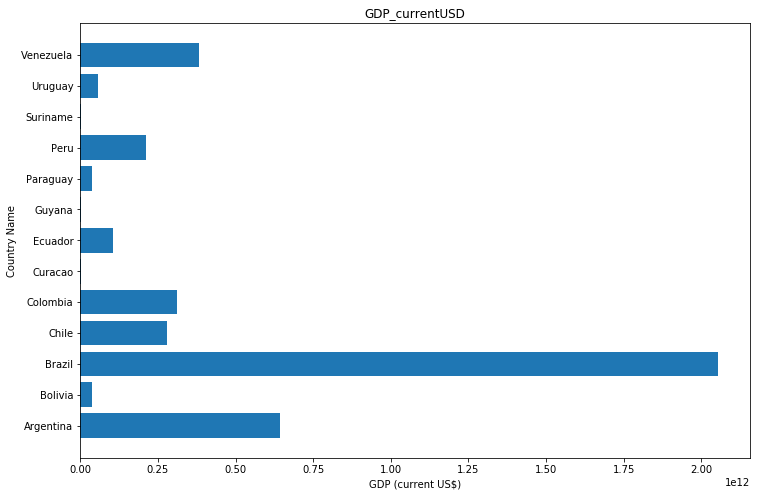

In [35]:
plt.figure(figsize=(12, 8))
plt.barh(y= df['Country Name'], width = df['GDP (current US$)'])
plt.title('GDP_currentUSD')
plt.xlabel('GDP (current US$)')
plt.ylabel('Country Name')
plt.savefig('GDP_currentUSD.png', dpi=80)

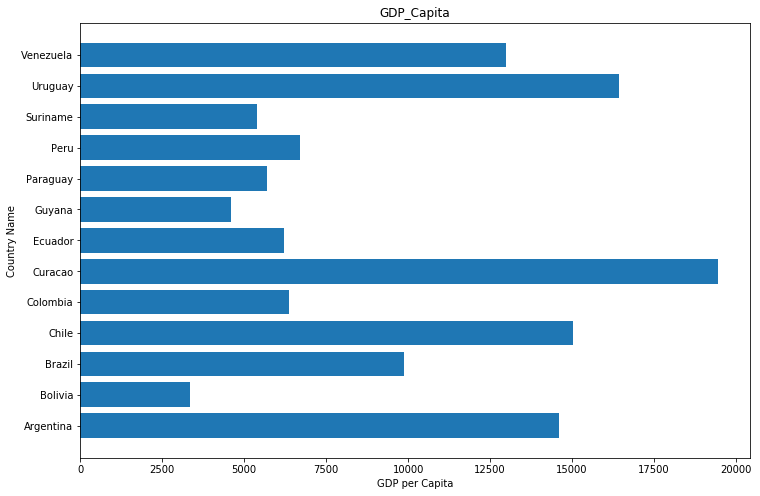

In [36]:
fig = plt.figure(figsize=(12, 8))
plt.barh(y= df['Country Name'], width = df['gdp_capita'])
plt.title('GDP_Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Country Name')
plt.savefig('GDP_Capita.png', dpi=80)

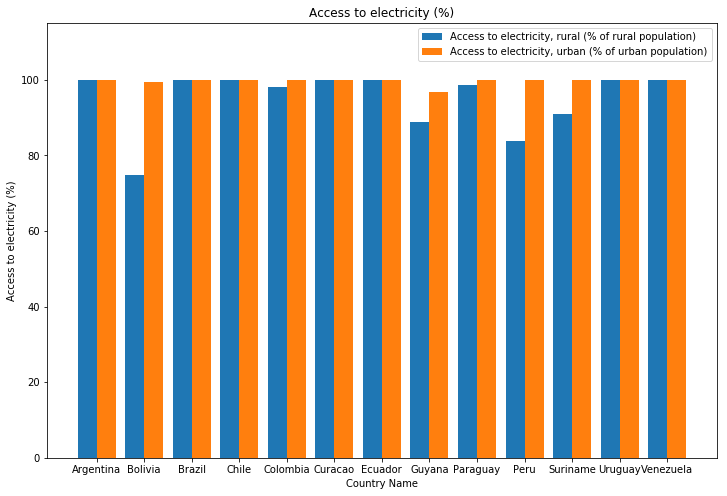

In [37]:
df_con = pd.read_excel('finalData.xlsx', index_col=0)
fig = plt.figure(figsize=(12, 8))
width = 0.4
plt.bar(np.arange(len(df_con.index))-0.2, df_con['Access to electricity, rural (% of rural population)'], width=width, label='Access to electricity, rural (% of rural population)')
plt.bar(np.arange(len(df_con.index)) + 0.2, df_con['Access to electricity, urban (% of urban population)'], width=width, label='Access to electricity, urban (% of urban population)')
plt.xticks(np.arange(len(df_con.index)), df_con.index)
plt.legend(loc='best')

plt.ylim(0, 115)
plt.title('Access to electricity (%)')
plt.xlabel('Country Name')
plt.ylabel('Access to electricity (%)')
plt.savefig('Access to electricity.png', dpi=80)

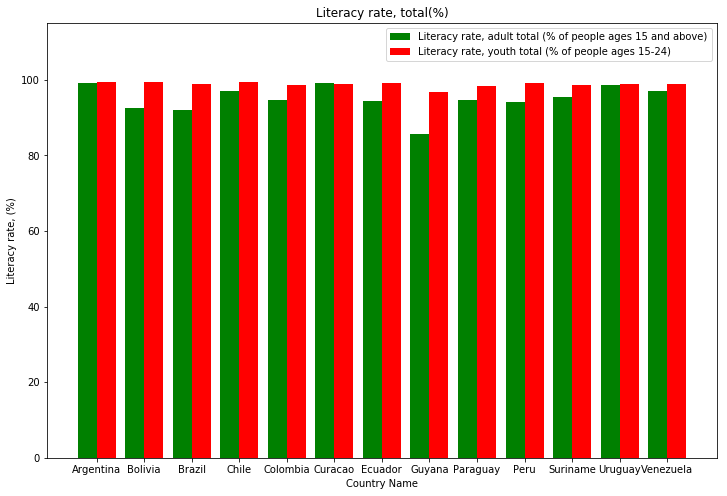

In [38]:
fig = plt.figure(figsize=(12, 8))
width = 0.4
plt.bar(np.arange(len(df_con.index))-0.2, df_con['Literacy rate, adult total (% of people ages 15 and above)'], width=width, label='Literacy rate, adult total (% of people ages 15 and above)', color='green')
plt.bar(np.arange(len(df_con.index)) + 0.2, df_con['Literacy rate, youth total (% of people ages 15-24)'], width=width, label='Literacy rate, youth total (% of people ages 15-24)', color='red')
plt.xticks(np.arange(len(df_con.index)), df_con.index)
plt.legend(loc='best')

plt.ylim(0, 115)
plt.title('Literacy rate, total(%)')
plt.xlabel('Country Name')
plt.ylabel('Literacy rate, (%)')
plt.savefig('Literacy rate total.png', dpi=80)

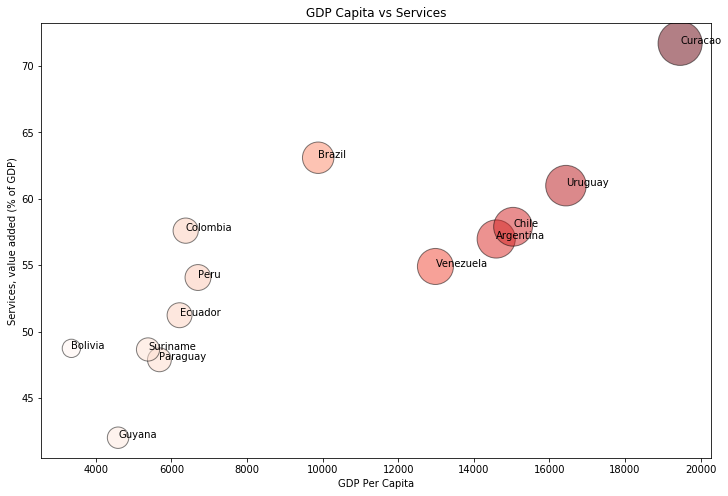

In [39]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x='gdp_capita', y='Services, value added (% of GDP)'
        , s=df['gdp_capita'] / 10, data=df, c='gdp_capita', cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df['gdp_capita'].values[i], df['Services, value added (% of GDP)'].values[i], df['Country Name'].values[i])

plt.title('GDP Capita vs Services')
plt.xlabel("GDP Per Capita")
plt.ylabel("Services, value added (% of GDP)")
plt.savefig('GDP Capita vs Services.png', dpi = 80)
plt.show()

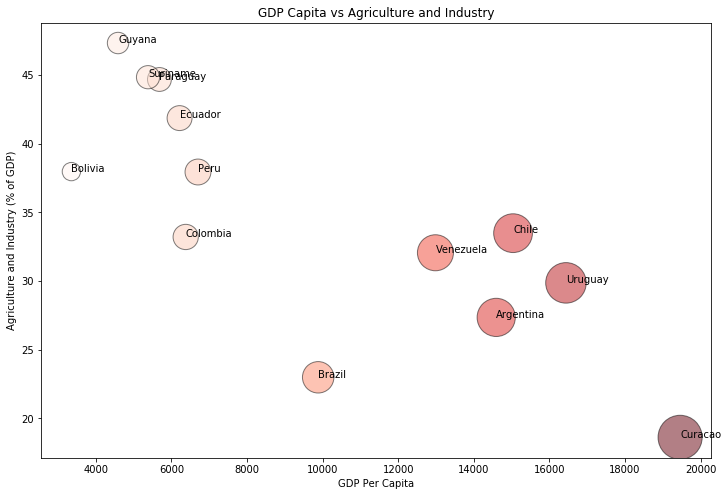

In [40]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=df['gdp_capita'], y=df['Agriculture, forestry, and fishing, value added (% of GDP)']+df['Industry (including construction), value added (% of GDP)']
        , s=df['gdp_capita'] / 10, c=df['gdp_capita'], cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df['gdp_capita'].values[i], (df['Agriculture, forestry, and fishing, value added (% of GDP)']+df['Industry (including construction), value added (% of GDP)']).values[i], df['Country Name'].values[i])

plt.xlabel("GDP Per Capita")
plt.ylabel("Agriculture and Industry (% of GDP)")
plt.title('GDP Capita vs Agriculture and Industry')
plt.savefig('GDP Capita vs Agriculture and Industry.png', dpi = 80)
plt.show()

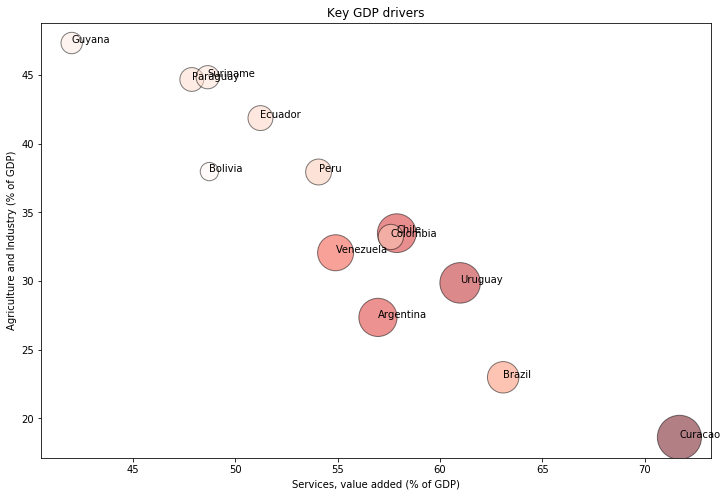

In [41]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=df['Services, value added (% of GDP)'], y=df['Agriculture, forestry, and fishing, value added (% of GDP)']+df['Industry (including construction), value added (% of GDP)']
        , s=df['gdp_capita'] / 10, c=df['gdp_capita'], cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df['Services, value added (% of GDP)'].values[i]
             ,(df['Agriculture, forestry, and fishing, value added (% of GDP)']+df['Industry (including construction), value added (% of GDP)']).values[i], df['Country Name'].values[i])

plt.xlabel("Services, value added (% of GDP)")
plt.ylabel("Agriculture and Industry (% of GDP)")
plt.title('Key GDP drivers')
plt.savefig('Services, value added (% of GDP) vs Agriculture and Industry.png', dpi = 80)
plt.show()

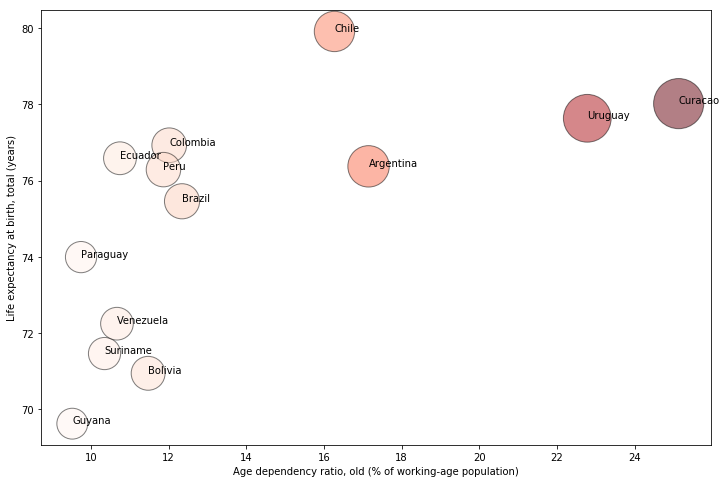

In [42]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x='Age dependency ratio, old (% of working-age population)', y='Life expectancy at birth, total (years)'
        , s=df['Age dependency ratio, old (% of working-age population)'] * 100, data=df, c='Age dependency ratio, old (% of working-age population)'
        , cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df['Age dependency ratio, old (% of working-age population)'].values[i], df['Life expectancy at birth, total (years)'].values[i], df['Country Name'].values[i])

plt.xlabel("Age dependency ratio, old (% of working-age population)")
plt.ylabel("Life expectancy at birth, total (years)")
plt.savefig('Age dependency ratio vs Life expectancy.png', dpi = 80)
plt.show()

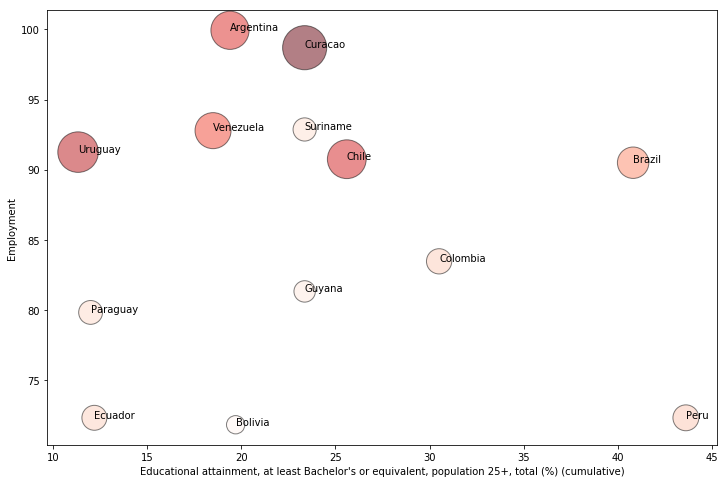

In [43]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=df["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"], y=df['Employment in services (% of total employment) (modeled ILO estimate)'] + df['Employment in industry (% of total employment) (modeled ILO estimate)']
        , s=df['gdp_capita'] / 10
        , c=df['gdp_capita'] / 10, cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"].values[i], (df['Employment in services (% of total employment) (modeled ILO estimate)'] + df['Employment in industry (% of total employment) (modeled ILO estimate)']).values[i], df['Country Name'].values[i])

plt.xlabel("Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)")
plt.ylabel("Employment")
plt.savefig('Educational attainment vs Employment.png', dpi = 80)
plt.show()

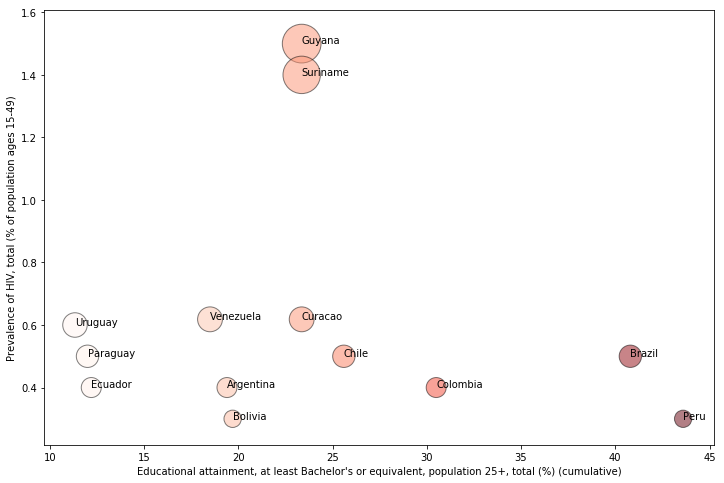

In [44]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x="Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)", y='Prevalence of HIV, total (% of population ages 15-49)'
        , s=df['Prevalence of HIV, total (% of population ages 15-49)']* 1000, data=df 
        , c="Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)", cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df["Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"].values[i], df['Prevalence of HIV, total (% of population ages 15-49)'].values[i], df['Country Name'].values[i])

plt.xlabel("Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)")
plt.ylabel("Prevalence of HIV, total (% of population ages 15-49)")
plt.savefig('Educational attainment (least Bachelor) vs Prevalence of HIV.png', dpi = 80)
plt.show()

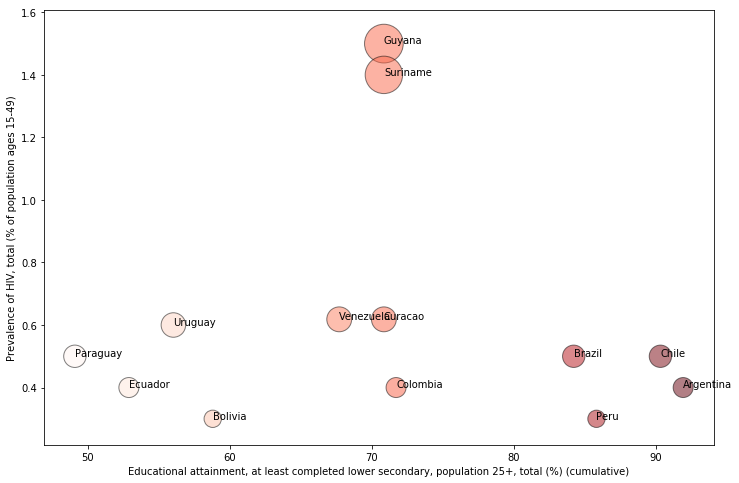

In [45]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x="Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)", y='Prevalence of HIV, total (% of population ages 15-49)'
        , s=df['Prevalence of HIV, total (% of population ages 15-49)']* 1000, data=df 
        , c="Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)", cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].values[i], df['Prevalence of HIV, total (% of population ages 15-49)'].values[i], df['Country Name'].values[i])

plt.xlabel("Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)")
plt.ylabel("Prevalence of HIV, total (% of population ages 15-49)")
plt.savefig('Educational attainment (lower secondary) vs Prevalence of HIV.png', dpi = 80)
plt.show()

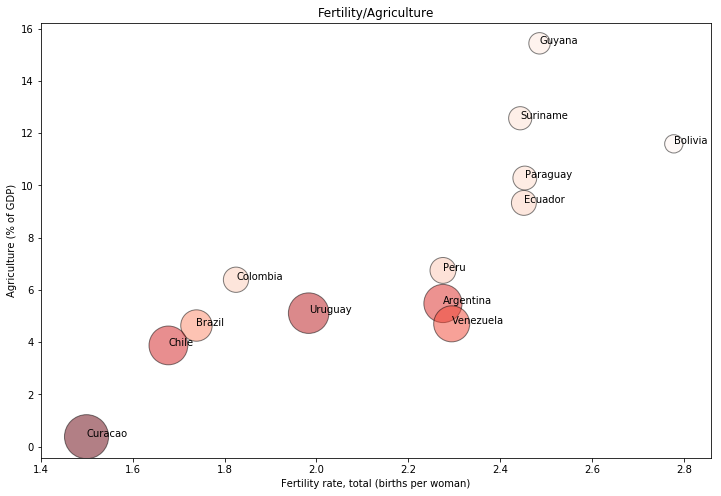

In [46]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=df['Fertility rate, total (births per woman)'], y=df['Agriculture, forestry, and fishing, value added (% of GDP)']
        , s=df['gdp_capita']/10
        , c=df['gdp_capita'], cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df['Fertility rate, total (births per woman)'].values[i]
             ,(df['Agriculture, forestry, and fishing, value added (% of GDP)']).values[i], df['Country Name'].values[i])

plt.xlabel("Fertility rate, total (births per woman)")
plt.ylabel("Agriculture (% of GDP)")
plt.title('Fertility/Agriculture')
plt.savefig('Fertility vs agri', dpi = 80)
plt.show()

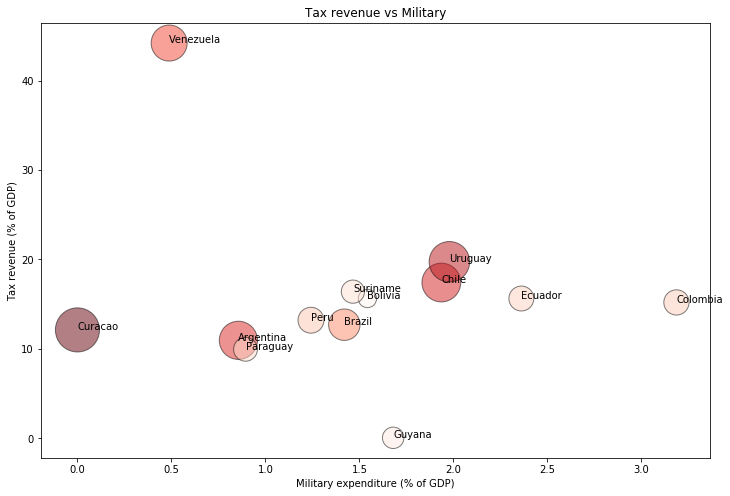

In [7]:
# use the scatter function
fig = plt.figure(figsize=(12, 8))   
plt.scatter(x='Military expenditure (% of GDP)', y='Tax revenue (% of GDP)'
        , s=df['gdp_capita'] / 10, data=df, c='gdp_capita', cmap="Reds", alpha=0.5
        , edgecolors="black"
        , linewidth=1)
for i in range(df.shape[0]):
    plt.text(df['Military expenditure (% of GDP)'].values[i], df['Tax revenue (% of GDP)'].values[i], df['Country Name'].values[i])

plt.xlabel("Military expenditure (% of GDP)")
plt.ylabel("Tax revenue (% of GDP)")
plt.title("Tax revenue vs Military")
plt.savefig('Tax revenue vs Military,png')
plt.show()

## Linear Regression

In [48]:
# In this part, We did linear regression on People subset
# From correlation map, we found the Age dependency ratio young ( % of working-age population) column has strong 
# correlationship with other columns, we use this column to be our target variable and the rest of varibles are 
# the explanatory variables.

### Picking the subset

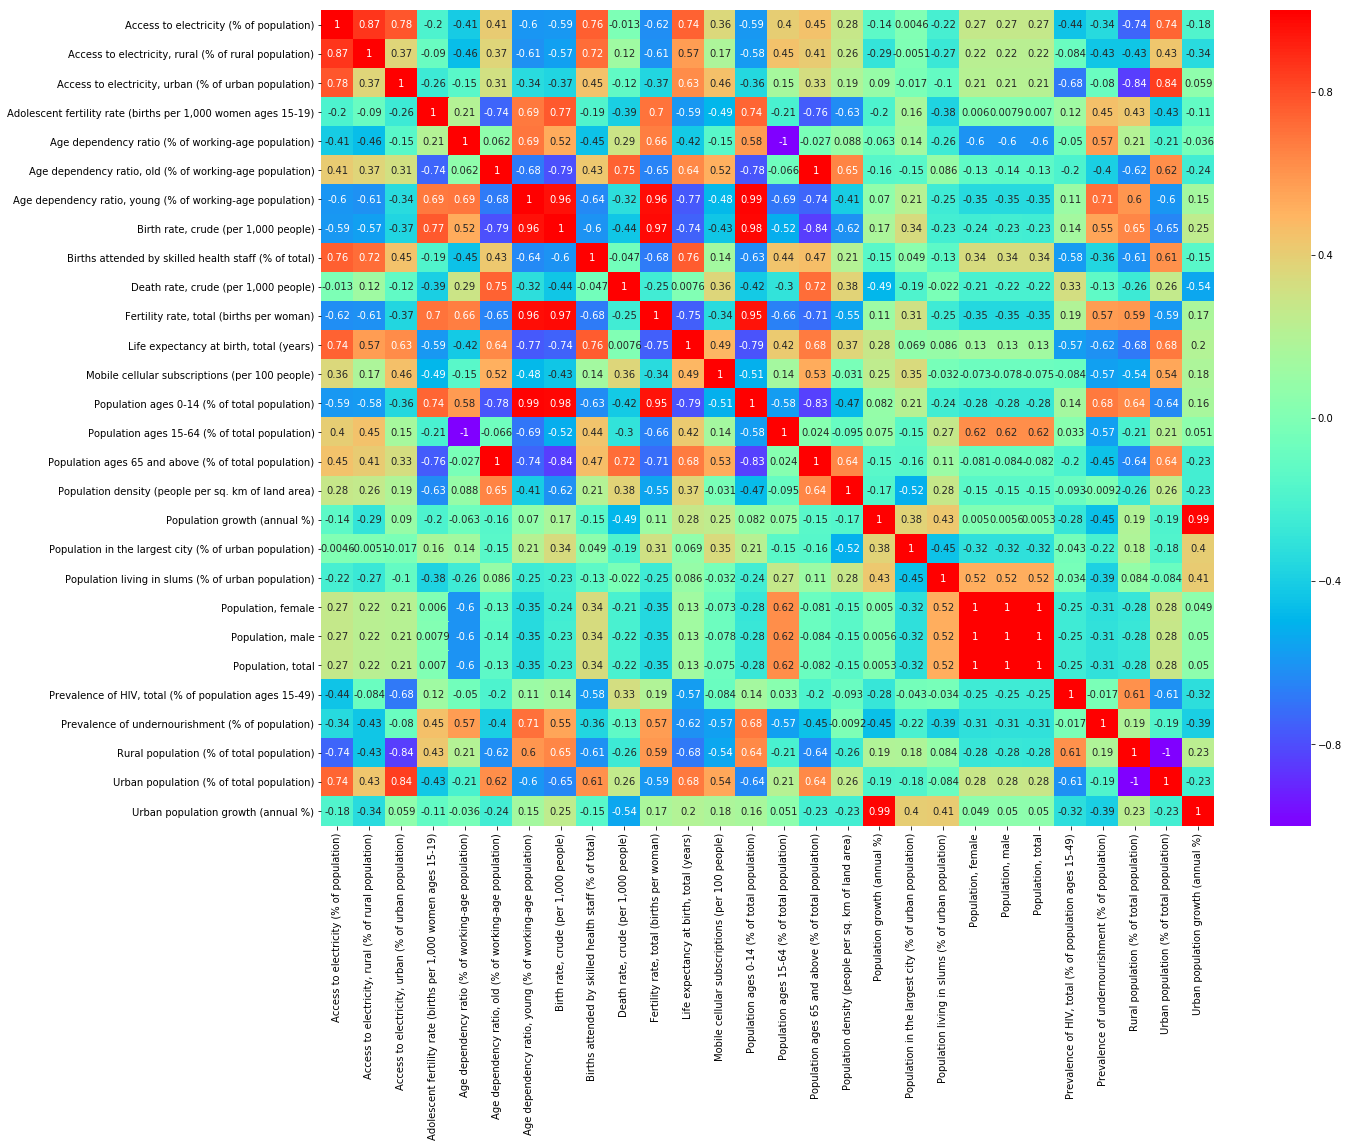

In [49]:
peopleList = [
'Access to electricity (% of population)'
,'Access to electricity, rural (% of rural population)'
,'Access to electricity, urban (% of urban population)'
,'Adolescent fertility rate (births per 1,000 women ages 15-19)'
,'Age dependency ratio (% of working-age population)'
,'Age dependency ratio, old (% of working-age population)'
,'Age dependency ratio, young (% of working-age population)'
,'Birth rate, crude (per 1,000 people)'
,'Births attended by skilled health staff (% of total)'
,'Death rate, crude (per 1,000 people)'
,'Fertility rate, total (births per woman)'
,'Life expectancy at birth, total (years)'
,'Mobile cellular subscriptions (per 100 people)'
,'Population ages 0-14 (% of total population)'
,'Population ages 15-64 (% of total population)'
,'Population ages 65 and above (% of total population)'
,'Population density (people per sq. km of land area)'
,'Population growth (annual %)'
,'Population in the largest city (% of urban population)'
,'Population living in slums (% of urban population)'
,'Population, female'
,'Population, male'
,'Population, total'
,'Prevalence of HIV, total (% of population ages 15-49)'
,'Prevalence of undernourishment (% of population)'
,'Rural population (% of total population)'
,'Urban population (% of total population)'
,'Urban population growth (annual %)'
]

plt.figure(figsize=(20, 15))
people = df.loc[:, peopleList]
sns.heatmap(people.corr(), cmap='rainbow', annot=True)
plt.savefig('people.png', dpi=80)

### Processing the column names

In [50]:
# Because there is a lot of special characters in the name of columns
# Replcing all of these special characters with ''

In [51]:
newPeople = people.copy()
newName = [each.replace(' ', '').replace('-', '').replace(',', '').replace('%', '').replace('(', '').replace(')', '').replace('.', '') for each in newPeople.columns]
newPeople.columns = newName

### Normalize the data

In [52]:
# Differenet columns have different scale.
# Normlizing the data to the same scale.

In [53]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
normalizedValue = norm.fit_transform(newPeople.values)
newPeople = pd.DataFrame(normalizedValue, index=newPeople.index, columns=newPeople.columns)

### Regression function

In [54]:
# Building a linear regression
# Using the Forward Stepwise method to select explanatory varibles 

In [55]:
def forward_selected(data, target, method):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

### Regression model

In [56]:
# Fitting linear model
# Getting analysis of variance table and the p-values

In [59]:
explantoryList = [each for each in newPeople.columns if each not in ['Populationages014oftotalpopulation','Agedependencyratioofworkingagepopulation','Agedependencyratiooldofworkingagepopulation','Populationinthelargestcityofurbanpopulation']]
response = 'Agedependencyratioyoungofworkingagepopulation'

model = forward_selected(newPeople[explantoryList], response, 'AIC')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     Agedependencyratioyoungofworkingagepopulation   R-squared:                       1.000
Model:                                                       OLS   Adj. R-squared:                  1.000
Method:                                            Least Squares   F-statistic:                 1.169e+09
Date:                                           Tue, 05 Nov 2019   Prob (F-statistic):           2.28e-05
Time:                                                   16:12:12   Log-Likelihood:                 263.89
No. Observations:                                             13   AIC:                            -503.8
Df Residuals:                                                  1   BIC:                            -497.0
Df Model:                                                     11                                         
Covariance Type:                                       nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.078e-06   1.23e-07     -8.783      0.072   -2.64e-06    4.81e-07
Fertilityratetotalbirthsperwoman                     16.7112      0.503     33.240      0.019      10.323      23.099
Populationlivinginslumsofurbanpopulation             -6.2939      0.257    -24.530      0.026      -9.554      -3.034
Populationfemale                                   2.639e-06   2.94e-07      8.961      0.071    -1.1e-06    6.38e-06
Populationgrowthannual                               -3.1675      0.065    -48.650      0.013      -3.995      -2.340
Populationdensitypeoplepersqkmoflandarea              0.0164      0.000    104.122      0.006       0.014       0.018
Mobilecellularsubscriptionsper100people               0.0119      0.001     12.296      0.052      -0.000       0.024
Adolescentfertilityratebirthsper1000womenages1519     0.0294      0.004      7.495      0.084      -0.020       0.079
Urbanpopulationgrowthannual                           4.5690      0.066     69.409      0.009       3.733       5.405
Birthratecrudeper1000people                          -0.3773      0.082     -4.596      0.136      -1.420       0.666
Prevalenceofundernourishmentofpopulation              0.4113      0.013     32.596      0.020       0.251       0.572
Ruralpopulationoftotalpopulation                      0.0659      0.003     19.517      0.033       0.023       0.109
==============================================================================
Omnibus:                       12.448   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.000
Skew:                           1.393   Prob(JB):                       0.0183
Kurtosis:                       5.648   Cond. No.                     1.67e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""